# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [12]:
# Output File (CSV)
output_data_file = "../WeatherPy/cities.csv"

In [13]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations - reset size to 1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [20]:
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

city = "chicago"


# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

# comment out URL query before pushing to github


In [22]:
#cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []
cloud = []
wind_speed = []
humidity = []
country = []
city_name = []
lon = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    complete_url = f'{query_url}{city}'
    response = requests.get(complete_url).json()
    #print(response)
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        city_name.append(city)
    except:
        #print("City not found")
        pass
        
        
        
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

In [23]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "cloud": cloud,
    "wind speed": wind_speed,
    "humidity": humidity,
    "country": country
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,lon,temp,cloud,wind speed,humidity,country
0,hermanus,-34.4187,19.2345,8.22,6,3.55,82,ZA
1,busselton,-33.6500,115.3333,10.58,99,8.59,74,AU
2,victoria,22.2855,114.1577,29.49,78,3.13,89,HK
3,georgetown,5.4112,100.3354,26.61,40,1.54,87,MY
4,cherskiy,68.7500,161.3000,13.80,100,5.90,45,RU
...,...,...,...,...,...,...,...,...
568,nuuk,64.1835,-51.7216,3.34,90,5.14,87,GL
569,ulenje,-8.9333,33.6833,7.96,36,2.23,92,TZ
570,lasa,46.6166,10.7002,18.35,18,1.68,96,IT
571,iguape,-24.7081,-47.5553,17.56,67,3.18,84,BR


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_data.to_csv(output_data_file, index = False)

In [25]:
(weather_data["humidity"]>100)

0      False
1      False
2      False
3      False
4      False
       ...  
568    False
569    False
570    False
571    False
572    False
Name: humidity, Length: 573, dtype: bool

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data[(weather_data["humidity"]>100)].index
high_humidity

Int64Index([], dtype='int64')

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(high_humidity)
clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 572
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        573 non-null    object 
 1   lat         573 non-null    float64
 2   lon         573 non-null    float64
 3   temp        573 non-null    float64
 4   cloud       573 non-null    int64  
 5   wind speed  573 non-null    float64
 6   humidity    573 non-null    int64  
 7   country     573 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 40.3+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

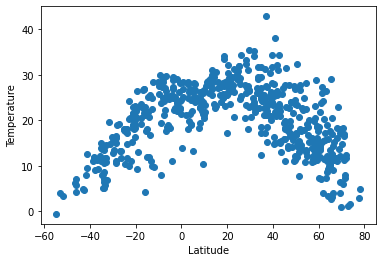

In [29]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [30]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
#regress_values = x_values * slope + intercept
#print(regress_values)

In [31]:
# Create line equation string
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)

In [32]:
# Create Plot
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
#plt.xlabel('Latitude')
#plt.ylabel('Temperature')
#plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
#plt.show()

The r-value is: 9.011366668480465e-05


## Latitude vs. Humidity Plot

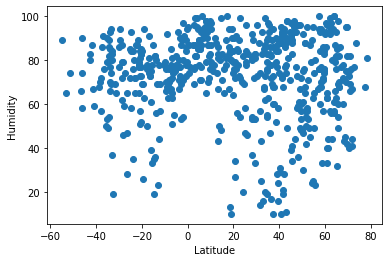

In [33]:
x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

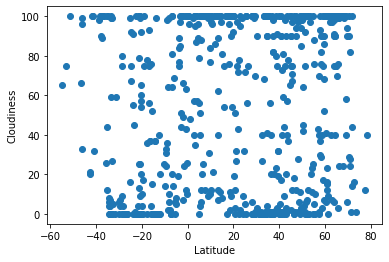

In [34]:
x_values = weather_data['lat']
y_values = weather_data['cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

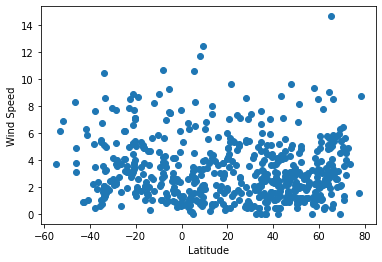

In [35]:
x_values = weather_data['lat']
y_values = weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [36]:
weather_data["lat"] >0

0      False
1      False
2       True
3       True
4       True
       ...  
568     True
569    False
570     True
571    False
572    False
Name: lat, Length: 573, dtype: bool

In [38]:
#find max temp of lats > 0
north_weather_data = weather_data.loc[(weather_data["lat"] >0)]
north_weather_data


,city,lat,lon,temp,cloud,wind speed,humidity,country
2,victoria,22.2855,114.1577,29.49,78,3.13,89,HK
3,georgetown,5.4112,100.3354,26.61,40,1.54,87,MY
4,cherskiy,68.7500,161.3000,13.80,100,5.90,45,RU
5,purepero,19.9167,-102.0167,17.21,100,1.91,84,MX
7,tezu,27.9167,96.1667,27.68,100,0.48,81,IN
...,...,...,...,...,...,...,...,...
565,buchanan,5.8808,-10.0467,23.98,100,3.31,93,LR
566,sinegorye,62.0788,150.4770,24.32,100,0.38,57,RU
567,ketchikan,55.3422,-131.6461,18.57,76,2.09,74,US
568,nuuk,64.1835,-51.7216,3.34,90,5.14,87,GL


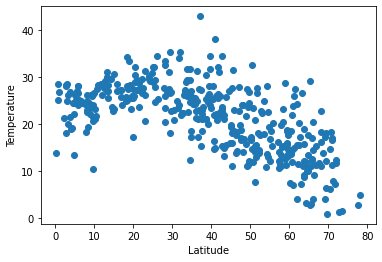

In [39]:
# Create a Scatter Plot for temperature vs latitude
x_values = north_weather_data['lat']
y_values = north_weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [40]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

2      24.825004
3      28.529792
4      14.623626
5      25.345079
7      23.588662
         ...    
565    28.426690
566    16.088302
567    17.567337
568    15.626211
570    19.483060
Name: lat, Length: 396, dtype: float64


In [41]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.22x +29.72


The r-value is: 0.3863166178444015


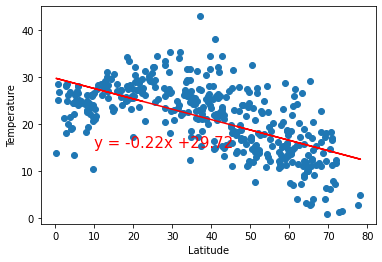

In [42]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [43]:
southern_weather_data = weather_data.loc[(weather_data["lat"] <0)]
southern_weather_data

,city,lat,lon,temp,cloud,wind speed,humidity,country
0,hermanus,-34.4187,19.2345,8.22,6,3.55,82,ZA
1,busselton,-33.6500,115.3333,10.58,99,8.59,74,AU
6,atuona,-9.8000,-139.0333,25.73,14,8.89,79,PF
8,sechura,-5.5569,-80.8222,18.57,6,7.57,76,PE
9,lebu,-37.6167,-73.6500,11.49,89,7.62,86,CL
...,...,...,...,...,...,...,...,...
560,mayumba,-3.4320,10.6554,22.29,85,2.01,90,GA
563,kirakira,-10.4544,161.9205,28.40,25,5.83,78,SB
569,ulenje,-8.9333,33.6833,7.96,36,2.23,92,TZ
571,iguape,-24.7081,-47.5553,17.56,67,3.18,84,BR


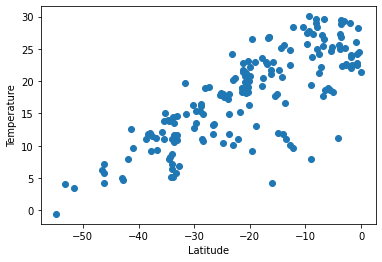

In [44]:
# Create a Scatter Plot for temperature vs latitude
x_values = southern_weather_data['lat']
y_values = southern_weather_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

0      11.819077
1      12.150056
6      22.419155
8      24.246107
9      10.442114
         ...    
560    25.161025
563    22.137389
569    22.792330
571    16.000172
572    17.937867
Name: lat, Length: 177, dtype: float64
y = 0.43x +26.64
The r-value is: 0.6162581945183953


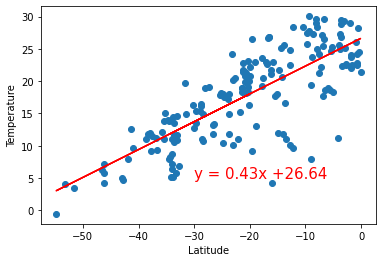

In [45]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

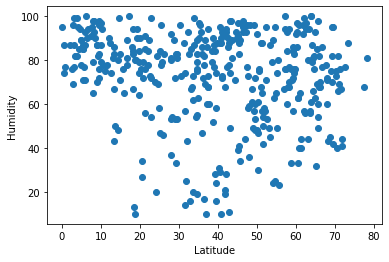

In [46]:
x_values = north_weather_data['lat']
y_values = north_weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

0     71.080758
1     69.358675
4     70.554520
5     72.824669
8     66.923156
9     66.332367
10    71.798540
13    68.853971
14    64.386549
15    71.439465
19    63.052834
20    72.801171
21    81.504522
22    80.932811
23    66.908743
24    69.814885
28    70.034765
30    77.155400
32    65.848361
36    72.156682
37    80.867792
42    69.523235
43    70.844501
44    81.049294
46    76.838189
47    80.513873
49    64.600192
50    66.147624
52    71.922071
53    72.100282
54    80.929840
55    71.503673
56    65.377738
58    66.979483
61    70.002010
62    65.204855
63    65.144280
64    67.036595
65    72.240018
67    67.411606
Name: lat, dtype: float64
y = -0.25x +82.26
The r-value is: 0.05290908014283964


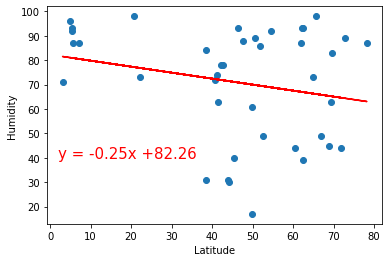

In [30]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(2,40),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

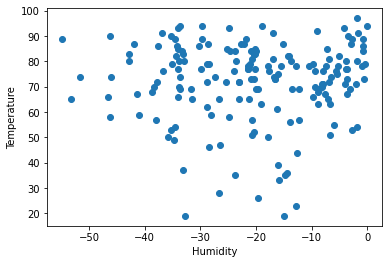

In [47]:
# Create a Scatter Plot for humidity vs latitude
x_values = southern_weather_data['lat']
y_values = southern_weather_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

0      71.616311
1      71.639045
6      72.344427
8      72.469920
9      71.521727
         ...    
560    72.532766
563    72.325073
569    72.370061
571    71.903509
572    72.036609
Name: lat, Length: 177, dtype: float64
y = 0.03x +72.63
The r-value is: 0.0005864914473535085


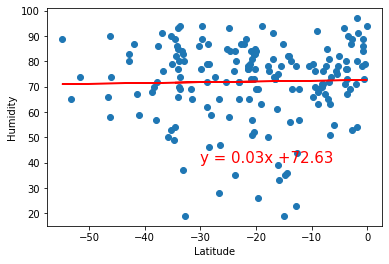

In [49]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

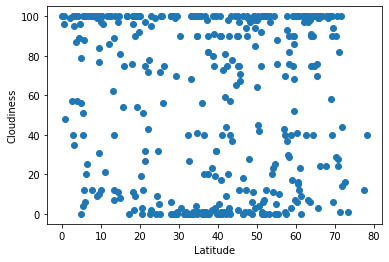

In [50]:
x_values = north_weather_data['lat']
y_values = north_weather_data['cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

2      59.022238
3      60.832419
4      54.037786
5      59.276350
7      58.418154
         ...    
565    60.782043
566    54.753435
567    55.476100
568    54.527655
570    56.412134
Name: lat, Length: 396, dtype: float64
y = -0.11x +61.41
The r-value is: 0.002849029446315366


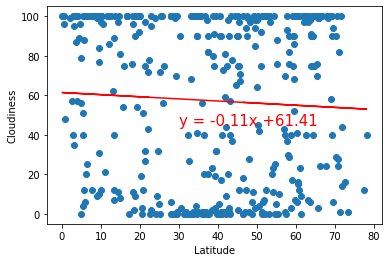

In [51]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(30,45),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

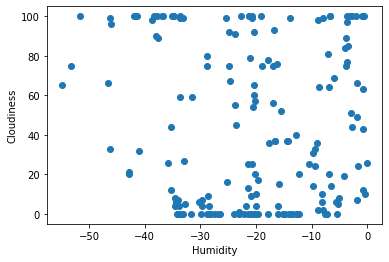

In [52]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_weather_data['lat']
y_values = southern_weather_data['cloud']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Cloudiness')
plt.show()

0      43.858519
1      43.745657
6      40.243972
8      39.620995
9      44.328053
         ...    
560    39.309015
563    40.340052
569    40.116722
571    42.432797
572    41.772058
Name: lat, Length: 177, dtype: float64
y = -0.15x +38.81
The r-value is: 0.0023337183893992054


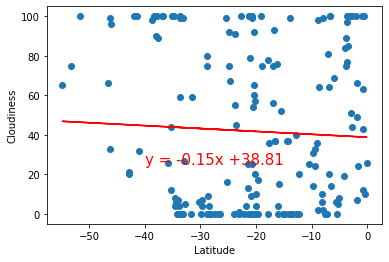

In [53]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

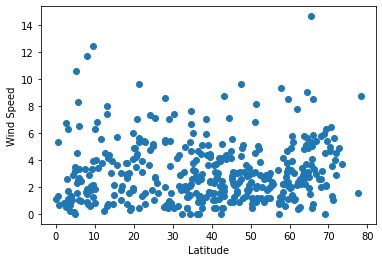

In [54]:
x_values = north_weather_data['lat']
y_values = north_weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

2      2.976347
3      2.877070
4      3.249714
5      2.962411
7      3.009478
         ...   
565    2.879833
566    3.210465
567    3.170831
568    3.222848
570    3.119496
Name: lat, Length: 396, dtype: float64
y = 0.01x +2.85
The r-value is: 0.00284632218530059


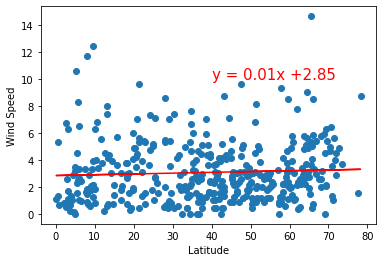

In [55]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

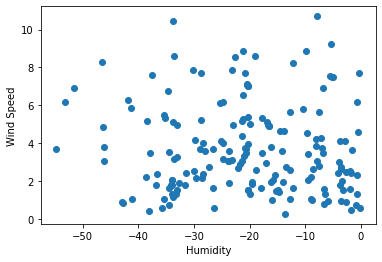

In [56]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_weather_data['lat']
y_values = southern_weather_data['wind speed']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Wind Speed')
plt.show()

0      3.894811
1      3.885101
6      3.583828
8      3.530230
9      3.935208
         ...   
560    3.503388
563    3.592095
569    3.572880
571    3.772147
572    3.715299
Name: lat, Length: 177, dtype: float64
y = -0.01x +3.46
The r-value is: 0.004883847773556755


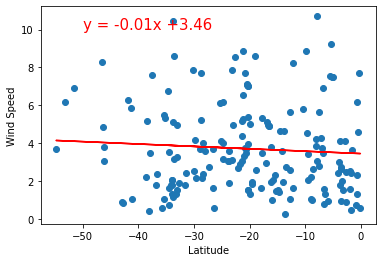

In [57]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# Add title to graph
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# # Print r value
print(f"The r-value is: {rvalue**2}")

# # Show plot
plt.show()

In [ ]:
# Three observable trends based on the data

# 1) As latitude increases, temperature decreases in the northern hemisphere

# 2) As latitude increases, temperature increases in the southern hemisphere

# 3) Wind speeds trend slightly higher in the northern hemisphere than they do in the southern hemisphere